<a href="https://colab.research.google.com/github/klarcika/TZ/blob/main/Naloga8_Gru%C4%8Denje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Naložite podatke iz datoteke v dataframe.
#Iz njega odstranite vse kategorične podatke.
#Številske podatke standardizirajte.
#Za nadaljnje analize boste potrebovali samo številske podatke.

import pandas as pd
df= pd.read_csv("university_rank_no_nan1.csv")

In [3]:
stevilski=df.select_dtypes(exclude=["object"])
dfSt = df[stevilski.columns]

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [20.0, 20.0, 43.75, 43.75],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [75.0, 75.0, 93.75, 93.75],
  [31.875, 31.875, 84.375, 84.375],
  [5.0, 5.0, 58.125, 58.125]],
 'dcoord': [[0.0, 81.92877152746773, 81.92877152746773, 0.0],
  [0.0, 80.81667061318477, 80.81667061318477, 0.0],
  [0.0, 90.2495671402362, 90.2495671402362, 80.81667061318477],
  [0.0, 129.65698740908644, 129.65698740908644, 90.2495671402362],
  [81.92877152746773,
   158.14779847029172,
   158.14779847029172,
   129.65698740908644],
  [0.0, 130.6753611052979, 130.6753611052979, 0.0],
  [0.0, 134.9292036588077, 134.9292036588077, 130.6753611052979],
  [0.0, 146.53106295387678, 146.53106295387678, 134.9292036588077],
  [0.0, 224.06862241354688, 224.06862241354688, 146.53106295387678],
  [158.14779847029172,
   384.26642165169727,
   384.26642165169727

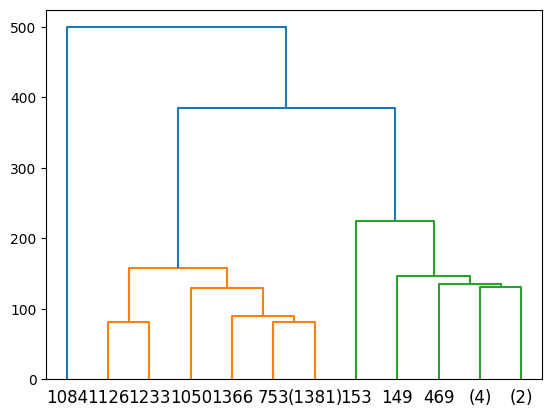

In [4]:
# 2. Da dobite približen vpogled na koliko gruč bi bilo najbolj
# optimalno deliti instance uporabite hierarhično gručenje in
# izrišite dendrogram z maksimalno delitvijo na 5 nivojev.

from scipy.cluster.hierarchy import linkage, dendrogram
razdalje=linkage(dfSt, "single")
dendrogram(razdalje, orientation="top", p=5, truncate_mode='level')

In [5]:
# 3. Izvedite gručenje z uporabo K-means algoritma.
# Algoritem naj razdeli instance v dve gruči.
# Izpišite koliko je instanc v posamezni gruči.
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
km= KMeans(n_clusters=2, random_state=0)
km.fit(dfSt)
gruce= km.labels_
st_instanc = {i: sum(gruce == i) for i in range(2)}
print("Število instanc v posamezni gruči:", st_instanc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Število instanc v posamezni gruči: {0: 834, 1: 562}


In [10]:
# 4. Naredite analizo koliko je optimalno število gruč pri uporabi
# K-means algoritma (preizkusite delitev na do 10 gruč) in
# izrišite graf po metodi komolca.
# Zapišite na koliko gruč je po vašem mnenju
# najbolj smiselno razdeliti instance.

v_in={}
for i in range(1,11):
  km2=KMeans(n_clusters=i, random_state=0, n_init="auto")
  km2.fit(dfSt)
  v_in[i]=km2.inertia_

Text(0.5, 0, 'število gruč')

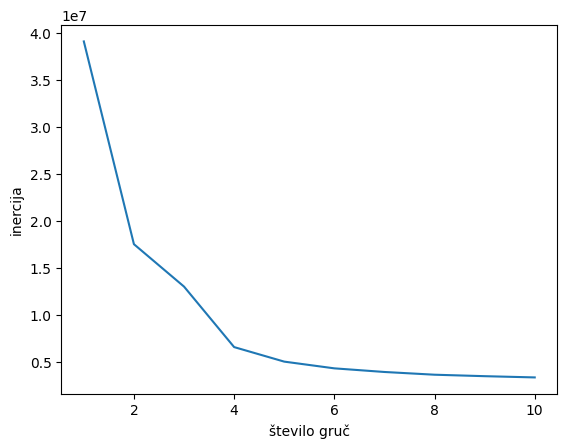

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x= list(v_in.keys()), y=list(v_in.values()))
plt.ylabel("inercija")
plt.xlabel("število gruč")

In [ ]:
#Najbolj je smiselno razdeliti na 2 ali 3 gruče, čeprav je še v 4ik en prelom
#zato bom rekla na 2-4

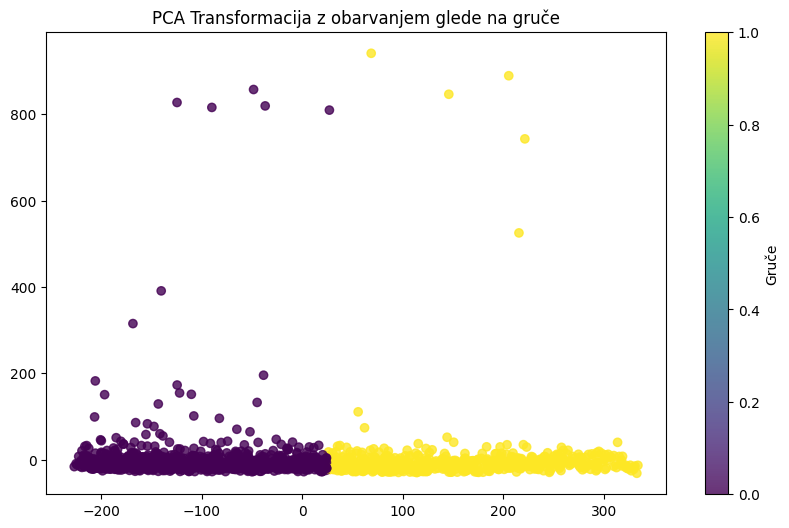

In [18]:
# 5. S pomočjo PCA transformacije naredite dva nova stolpca.
# Vrednosti iz teh dveh stolpcev prikažite v grafu raztrosa.
# Instance naj bodo obarvane glede na to, v katero gručo jih je razvrstil
# K-means algoritem. Uporabite rezultate k-means algoritma,
# ki po vašem mnenju razdeli instance v najbolj optimalno število gruč
#  (iz 4. točke).


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Uporabi PCA na celotnih podatkih
pca = PCA(n_components=2)
transformirani_podatki = pca.fit_transform(dfSt)

# Pridobimo oznake gruč za vsako instanco
km.labels_

# Ustvarimo DataFrame za prikaz rezultatov
df_pca = pd.DataFrame(data=transformirani_podatki, columns=['col1', 'col2'])

# Prikažemo graf raztrosa
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['col1'], df_pca['col2'], c=km.labels_, cmap='viridis', alpha=0.8)
plt.title('PCA Transformacija z obarvanjem glede na gruče')
plt.colorbar(label='Gruče')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


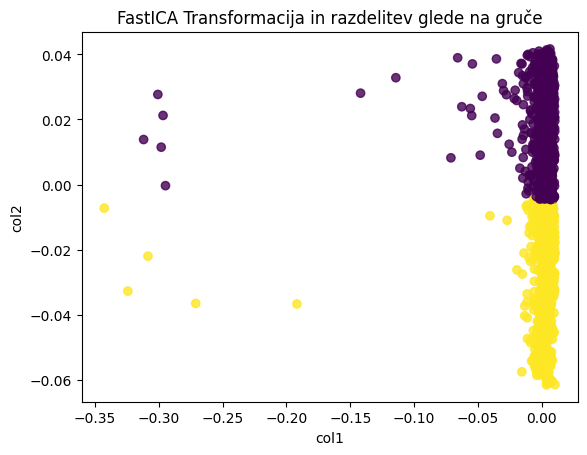

In [23]:
# 6. Naredite novo transformacijo številskih (še ne transformiranih podatkov)
#  s pomočjo algoritma FastICA, s katero ustvarite dva nova stolpca .
#  Na enak način kot v prejšnji točki izrišite graf raztrosa,
# le da tu uporabite vrednosti teh dveh novih stolpcev.

from sklearn.decomposition import FastICA#vse stolpce bomo prikazali znotraj enega grafa=> celoten dataset spremenimo v 2 stolpca

ica = FastICA(n_components=2)
transformed_data_ica = ica.fit_transform(dfSt)

df_ica = pd.DataFrame(data=transformed_data_ica, columns=['col1', 'col2'])

# Izris grafa raztrosa
plt.scatter(df_ica['col1'], df_ica['col2'], c=km.labels_, cmap='viridis', alpha=0.8)
plt.title('FastICA Transformacija in razdelitev glede na gruče')
plt.xlabel('col1')
plt.ylabel('col2')
plt.show()


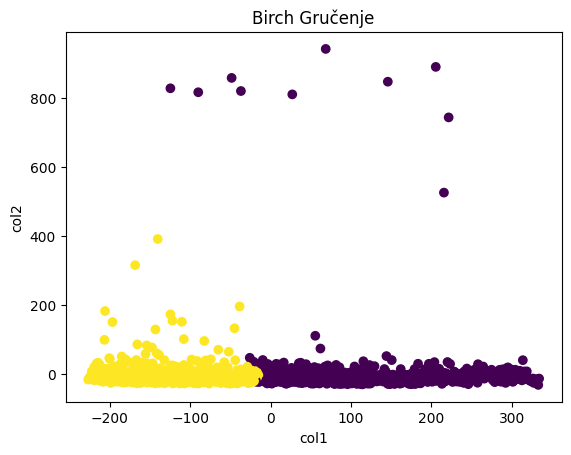

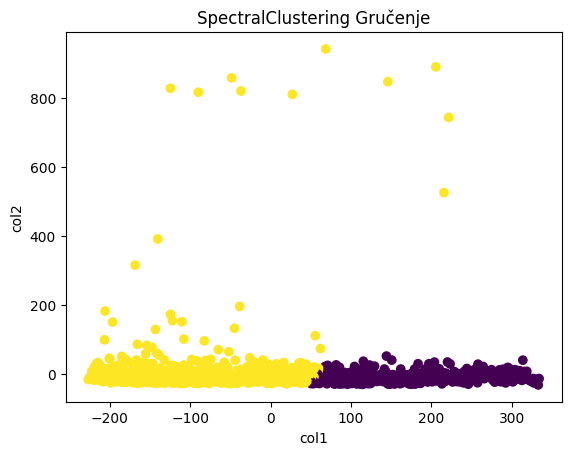

In [ ]:
# 7. Nad transformiranimi podatki iz 5. točke (z algoritmom PCA)
# izvedite gručenje z dvema poljubnima algoritmoma gručenja
# (npr. Birch, SpectralClustering, ...).  Vse algoritme gručenje,
# ki jih ponuja knjižnica sklearn najdete na povezavi.
# Algoritmom, ki zahtevajo predhodno določitev števila gruč,
# določite to število glede na najdeno optimalno vrednost iz 4.točke. Za oba izrišite
# graf raztrosa z obarvanimi instancami glede na pripadajočo gručo.
from sklearn.cluster import Birch, SpectralClustering

# Predpostavljamo, da so podatki shranjeni v spremenljivki transformed_data (rezultat PCA transformacije)
# Določitev števila gruč
num_clusters = 2  # Nastavite glede na rezultat iz 4. točke :2-4

# Gručenje z algoritmom Birch
birch = Birch(n_clusters=num_clusters)
birch_labels = birch.fit_predict(transformirani_podatki)

# Izris grafa raztrosa za Birch
plt.scatter(transformirani_podatki[:, 0], transformirani_podatki[:, 1], c=birch_labels, cmap='viridis')
plt.title('Birch Gručenje')
plt.xlabel('col1')
plt.ylabel('col2')
plt.show()

# Gručenje z algoritmom SpectralClustering
spectral = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors')
spectral_labels = spectral.fit_predict(transformirani_podatki)

# Izris grafa raztrosa za SpectralClustering
plt.scatter(transformirani_podatki[:, 0], transformirani_podatki[:, 1], c=spectral_labels, cmap='viridis')
plt.title('SpectralClustering Gručenje')
plt.xlabel('col1')
plt.ylabel('col2')
plt.show()
